# Introduction to Feature Engineering

[Resource](https://www.learndatasci.com/tutorials/intro-feature-engineering-machine-learning-python/)

During the creation of my first linear regression models, I noticed a serious knowledge gap in the form of feature engineering. After some preparation, a new learning path has been formed, and I will take the time to do a much needed deep dive into feature engineering. This is an intermediary step in the creation of my first legitimate model. Not the most fun topic, but like all others, it's an essential one.

As I always say, let's begin.

# Introduction

Let's put a face to the name: **Feature engineering is the process of transforming data to increase the predictive performance of machine learning models**. it's both useful and necessary for the following reasons:
1. Often better predictive accuracy: Leads to better weighting of variables. It can even lead to faster convergence.
1. Better interpretability of relationships in the data: When we engineer new features and understand how they relate with our outcome of interest, that opens up our understanding of the data. If we skip feature engineering and use complex models (that to a large degree automate feature engineering), we may still achieve a high evaluation score, at the cost of better understanding out data and its relationship with the target variable.

Every data science pipeline begins with **Exploratory Data Analysis (EDA)**. EDA is a crucial pre-cursor step as we get a better sense of what features we need to create/modify. The next step is usually data cleaning/standardization depending on how unstructured or messy the data is.

Feature engineering follows next and we begin that process by evaluating the baseline performance of the data at hand. We then iteratively construct features and continuously evaluate model performance (and compare it with the baseline performance) through a process called feature selection, until we are satisfied with the results.

## What this article does and doesn't cover

Feature engineering is a vast field as there are many domain-specific tangents. This article covers some of the popular techniques employed in handling tabular datasets. This will not cover feature engineering for natural language processing, image classification, time-series data, etc.

(Unfortunate. I don't. care for any of these except time-series data.)

# The two approaches to feature engineering

1. **The checklist approach:** using tried and tested methods to construct features.
1. **The domain-based approach:** incorporating domain knowledge of the dataset's subject matter into constructing new features.

Now we're gonna take a look at these approaches using some actual data. Let'do some importing.

In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette(['#851836', '#edbd17']))
sns.set_style("darkgrid")

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

We will now demonstrate the checklist approach using a dataset on supermarket sales. Note that the dataset has been slightly modified for the tutorial.

In [67]:
df = pd.read_csv('data/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# The Checklist Approach

## Numeric Aggregations

Numeric aggregation is a common feature engineering approach for longitudinal or panel data (data where subjects are repeated). In our dataset, we have categorical variables with repeated observations.

**Numeric aggregation involves three parameters:**
1. Categorical column
1. Numeric column(s) to be aggregated
1. Aggregation type: Mean, median, mode, standard deviation, variance, count, etc

We're gonna cover three examples of numeric aggregations based on mean, standard deviation, and count respectively. Our three parameters are:
1. Branch - categorical column, which we're grouping by
1. Tax 5%, Unit Price, Product line, and Gender - numeric columns to be aggregated
1. Mean, standard deviation, and count - aggregations to be used on the numeric columns

Let's start by grouping by Branch and perform the three statistical aggregations by transforming the numeric columns of interest.

In [68]:
grouped_df = df.groupby('Branch')

df[['tax_branch_mean', 'unit_price_mean']] = grouped_df[['Tax 5%', 'Unit price']].transform('mean')
df[['tax_branch_std', 'unit_price_std']] = grouped_df[['Tax 5%', 'Unit price']].transform('std')
df[['product_count', 'gender_count']] = grouped_df[['Product line', 'Gender']].transform('count')

And we see the features we've just created below.

(I added `Invoice ID` for more clarity.)

In [69]:
df[['Invoice ID', 'Branch', 'tax_branch_mean', 'unit_price_mean', 'tax_branch_std',
    'unit_price_std', 'product_count', 'gender_count']].head(10)



,Invoice ID,Branch,tax_branch_mean,unit_price_mean,tax_branch_std,unit_price_std,product_count,gender_count
0,750-67-8428,Alex,14.874001,54.780853,11.030477,26.132127,340,340
1,226-31-3081,Giza,16.052367,56.609024,12.531470,27.179799,328,328
2,631-41-3108,Alex,14.874001,54.780853,11.030477,26.132127,340,340
3,123-19-1176,Alex,14.874001,54.780853,11.030477,26.132127,340,340
4,373-73-7910,Alex,14.874001,54.780853,11.030477,26.132127,340,340
5,699-14-3026,Giza,16.052367,56.609024,12.531470,27.179799,328,328
6,355-53-5943,Alex,14.874001,54.780853,11.030477,26.132127,340,340
7,315-22-5665,Giza,16.052367,56.609024,12.531470,27.179799,328,328
8,665-32-9167,Alex,14.874001,54.780853,11.030477,26.132127,340,340
9,692-92-5582,Cairo,15.232024,55.659277,11.545122,26.224559,332,332


**Note:** The reason you're seeing repeating Branches after the grouping is because we used `.transform()`, not `.aggregate()`. This way we have one row per transaction with all its features, rather than losing the majority of the data.

## Choosing numeric aggregation parameters

How do we pick which three parameters to use? Well, that will depend on your domain knowledge and your understanding of the dataset. For example, in this dataset, if you feel like the variation in the **average** (aggregation type) **Rating** (numeric variable) based on the **Branch** (categorical column) is important in predicting **gross income** (target variable), create the feature! If you feel like the count of the products in the Product Line, by branch, is important in informing gross income, encode that as a feature!

Now if you can test as many combinations of the three parameters - go ahead - as long as you are meticulous at selecting only those features that have enough predictive power i,e, be sure to have a rigorous feature selection process.

Below we can see a couple of the columns we created (`tax_branch_mean` and `unit_price_mean`). They are aggregations based on the `Branch` variable.

In [70]:
df[['Tax 5%', 'Unit price', 'Branch', 'tax_branch_mean', 'unit_price_mean']]

,Tax 5%,Unit price,Branch,tax_branch_mean,unit_price_mean
0,26.1415,74.69,Alex,14.874001,54.780853
1,3.8200,15.28,Giza,16.052367,56.609024
2,16.2155,46.33,Alex,14.874001,54.780853
3,23.2880,58.22,Alex,14.874001,54.780853
4,30.2085,86.31,Alex,14.874001,54.780853
...,...,...,...,...,...
995,2.0175,40.35,Giza,16.052367,56.609024
996,48.6900,97.38,Cairo,15.232024,55.659277
997,1.5920,31.84,Alex,14.874001,54.780853
998,3.2910,65.82,Alex,14.874001,54.780853


## But why is all of this necessary?

Aren't good models designed to take aggregation into account? To an extent, yes, but not always. It depends a lot on the size and dimensionality of your dataset. The larger the dataset, the more features (by several orders of magnitude) you can create. When there are too many features, the model has too many competing signals to predict the target variable.

Feature engineering tries to explicitly focus the model's attention on certain features. To summarize, feature engineering is not about creating "new" information, but rather directing and/or focusing the model's attention on certain information, that you as the data scientist judge to be important.

# Indicator Variables and Interaction Terms

Following the same patten of thinking as numeric aggregations, we can construct indicator variables and interaction terms.

**Indicator variables** only take on the value 0 or 1 to indicate the absence or presence of some information.

For example, we're about to define an indicator variable `unit_price_50` to indicate if the product has unit price greater than 50. To put it into perspective, think of an e-commerce store having free shipping on all orders above $50; this may be useful information in predicting customer behavior and worth an explicit definition for the model.

**Interaction terms** are created base on the presence of interaction effects between two or more variables. This is largely driven by domain expertise, although there are statistical tests to help determine them (beyond the scope of this article. Definitely investigate this in-depth later). For example, while free shipping may affect customer rating, free shipping combined with quantity may have a different effect on customer rating, which would be useful to encode (assuming customer rating is the target variable in this case). Below we define the variable `unit_price_50 * qty` to be exactly that.

We use `np.where()` to create an indicator variable `unit_price_50` that encodes 1 when unit price is above 50 and 0 otherwise.

In [71]:
df['unit_price_50'] = np.where(df['Unit price'] > 50, 1, 0)
df['unit_price_50 * qty'] = df['unit_price_50'] * df['Quantity']

df[['Invoice ID', 'unit_price_50', 'unit_price_50 * qty']].head()

,Invoice ID,unit_price_50,unit_price_50 * qty
0,750-67-8428,1,7
1,226-31-3081,0,0
2,631-41-3108,0,0
3,123-19-1176,1,8
4,373-73-7910,1,7


# Numeric Transformations

Some data scientists don't consider numeric transformations to fall under feature engineering. This is because many models, especially the newer ones like tree-based models, aren't impacted by these transformations. In other words, performing these transformations does nothing to improve predictive performance. But for other models such as linear regression, these transformations can make a big difference as they are sensitive to the scale of their variables.

Below we construct a new variable `log_cogs` to correct for the right skew in the variable `cogs`. The effect is shown in the plots below.

We can also do other transformations such as squaring a variable if we believe the relationship between a predictor and target variable is not linear, but quadratic in nature.

We can even have cubed variables or any n degree polynomial term.

In [72]:
df['log_cogs'] = np.log(df['cogs'] + 1)
df['gross income squared'] = np.square(df['gross income'])

df[['cogs', 'log_cogs', 'gross income', 'gross income squared']].head()

,cogs,log_cogs,gross income,gross income squared
0,522.83,6.261167,26.1415,683.378022
1,76.40,4.348987,3.8200,14.592400
2,324.31,5.784779,16.2155,262.942440
3,465.76,6.145815,23.2880,542.330944
4,604.17,6.405509,30.2085,912.553472


<Axes: xlabel='log_cogs', ylabel='Count'>

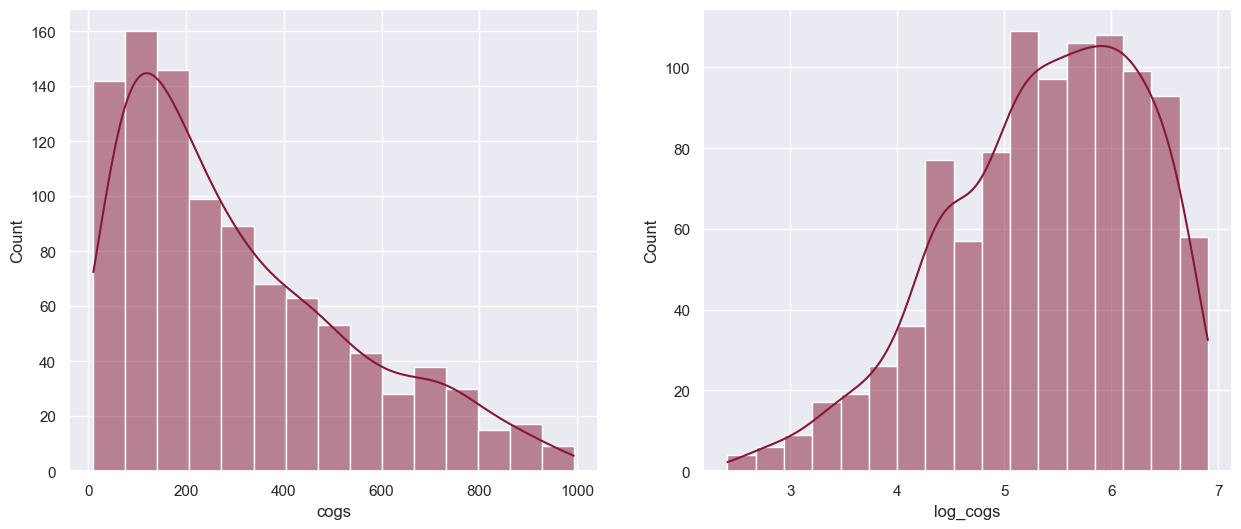

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

sns.histplot(df['cogs'], ax=ax1, kde=True)
sns.histplot(df['log_cogs'], ax=ax2, kde=True)

As we can see, the log transformation made the distribution of Cost of Goods Sold more normally distributed (or less right-skewed). This will benefit models like linear regression as their weights/coefficients won't be strongly influenced by outliers that caused the initial skewness.

As an aside, since we'll be comparing plots next to each other like this many times, we'll use this helper function from now on:

In [74]:
def plot_hist(data1, data2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data1, ax=ax1, kde=True)
    sns.histplot(data2, ax=ax2, kde=True);

# Numeric Scaling

The columns in a dataset are usually on different scales. As you know, we can correct this with normalization. We can see the range of `gross income` and `Rating` currently in our dataset:

Gross income range: 0.5085 to 49.65
Rating range: 4.0 to 10.0


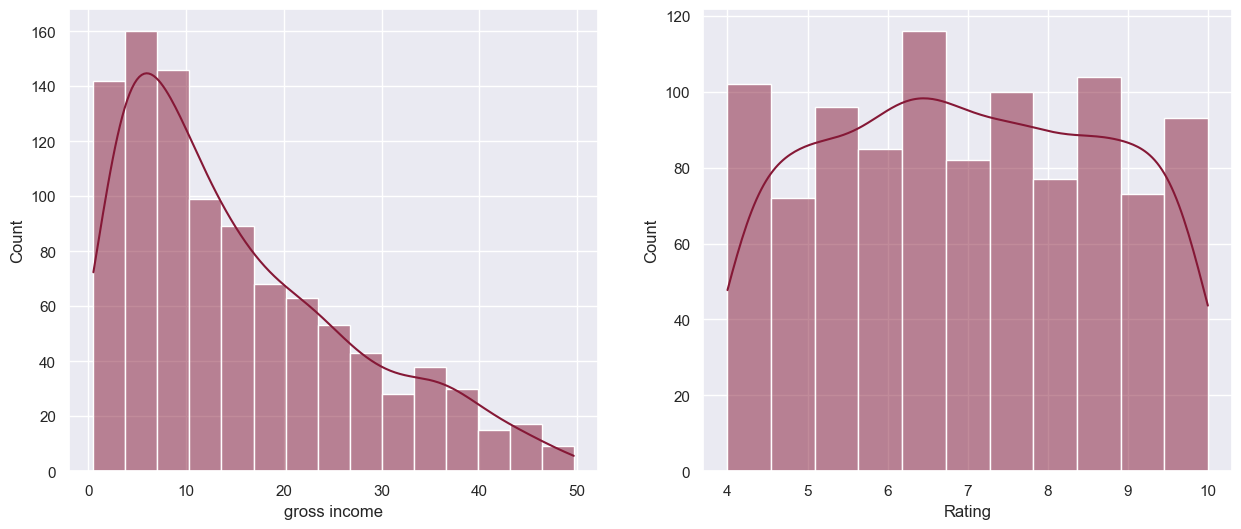

In [75]:
gincome = df["gross income"]
rating = df["Rating"]

print(f'Gross income range: {gincome.min()} to {gincome.max()}')
print(f'Rating range: {rating.min()} to {rating.max()}')

plot_hist(gincome, rating)

We can see the difference in scale after applying normalization below.

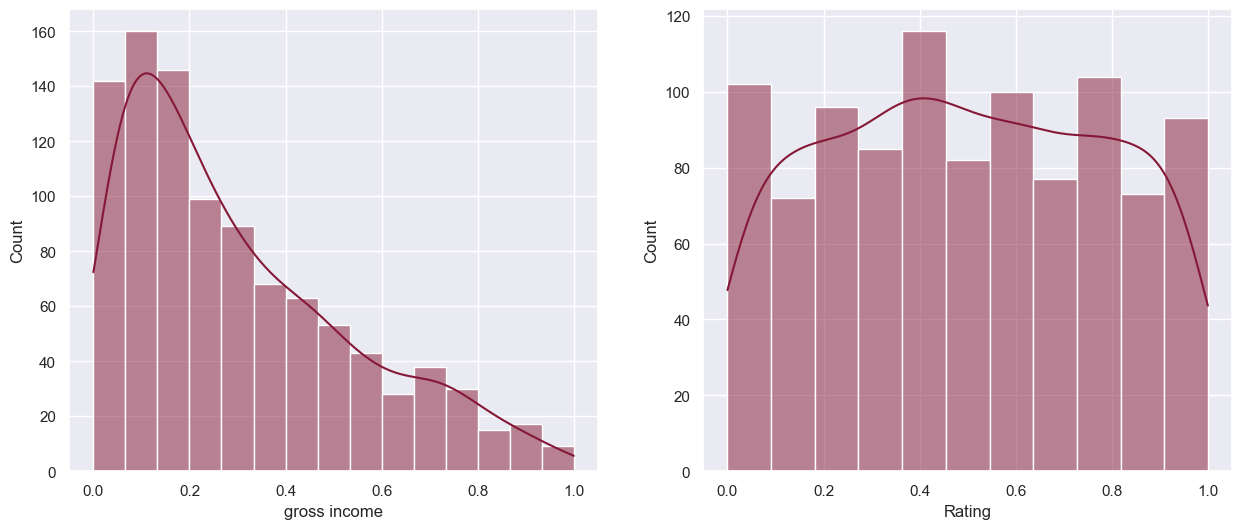

In [76]:
df[['gross income', 'Rating']] = MinMaxScaler().fit_transform(df[['gross income', 'Rating']])
plot_hist(df['gross income'], df['Rating'])

The graphs might look the same, but take a look at the x axis if you're somehow confused.

# Categorical Variable Handling

## One-hot encoding

Machine learning models can only have numeric variables. Therefor we must encode categorical variables as numeric ones. The easiest way to do this (again, as you know) is to one-hot-encode. Here's an example using `Gender` and `Payment`:

In [77]:
pd.get_dummies(df[['Gender', 'Payment']]).head()

,Gender_Female,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,True,False,False,False,True
1,True,False,True,False,False
2,True,False,False,True,False
3,True,False,False,False,True
4,True,False,False,False,True


But there are problems with this approach. If we have a column with too many categories (again again, as you know), you're adding a lot of dimensions to the data making it more difficult to find patterns.

## Target Encoding

To resolve this, we can use target encoding. Target encoding doesn't create additional columns. The idea is simple - For each unique category, the average value of the target variable (assuming it's either continuous or binary) is calculated and that becomes the value for the respective category in the categorical column.

Let's look at a simple example first before we apply it to our dataset. We have two columns - the target and the predictor variable. **Our goal is to encode the predictor variable (a categorical column) into a numeric variable that can be used by the model**. To do this we simply group by the predictor variable to get the mean target value for each predictor category. So for predictor `a` the encoded value will be the mean of 1 and 5. For `b` it's the mean of 4 and 6.

In [78]:
target = [1, 4, 5, 6]
predictor = ['a', 'b', 'a', 'b']

target_enc_df = pd.DataFrame(data={'target': target, 'predictor': predictor})
means = target_enc_df.groupby('predictor')['target'].mean()

target_enc_df['predictor_encoded'] = target_enc_df['predictor'].map(means)
target_enc_df

,target,predictor,predictor_encoded
0,1,a,3.0
1,4,b,5.0
2,5,a,3.0
3,6,b,5.0


Next, we use target encoding in our supermarket dataset. For the example below, we use `Product line` as the categorical column that is target encoded, and `Rating` is the target variable, which is a continuous variable.

In [79]:
means = df.groupby('Product line')['Rating'].mean()

df['Product line target encoded'] = df['Product line'].map(means)
df[['Product line', 'Product line target encoded', 'Rating']]

,Product line,Product line target encoded,Rating
0,Health and beauty,0.500548,0.850000
1,Electronic accessories,0.487451,0.933333
2,Home and lifestyle,0.472917,0.566667
3,Health and beauty,0.500548,0.733333
4,Sports and travel,0.486044,0.216667
...,...,...,...
995,Health and beauty,0.500548,0.366667
996,Home and lifestyle,0.472917,0.066667
997,Food and beverages,0.518870,0.616667
998,Home and lifestyle,0.472917,0.016667


Target encoding does have its downsides - when a category only appears once, the mean value of that category is the value itself (the mean of one number is the number itself). In general, it isn't always a good idea to rely on an average when the number of value used in the average is low. It leads to problems with generalizing results in the training dataset to the testing dataset.

# Missing Value Handling

**Note:** The data was modified to contain missing values. The original Kaggle data (the data you're using) doesn't. To avoid wasting time here, we're just gonna use the dataset from the first regression practice.

Here's how we can visualize missing values using Seaborn.

In [80]:
nan_df = pd.read_csv('data/used_cars.csv')
plt.figure(figsize=(15, 15))
sns.heatmap(nan_df.isnull(), cbar=False)

FileNotFoundError: [Errno 2] No such file or directory: 'data/used_cars.csv'

See that? Now it's easy to visually tell where we have missing values. However, I feel that simply printing the percent of nan values might be a bit of a better approach personally. Maybe this will be more useful in a more complex missing data scenario.

Now here's how you can remove columns with missing values within a given threshold. As you know, this is a dumb way to approach an ML problem, and the author agrees.

In [ ]:
threshold = 0.7

df = df[df.columns[df.isnull().mean() < threshold]]
df = df.loc[df.isnull().mean(axis=1) < threshold]

Alternatively, and as you've already explored, we can impute missing vbalues with a single value such as the mean or median of the column. For **categorical columns**, we could impute missing values with the mode.

```# Filling missing values with medians of the columns
df = df.fillna(df.median())

# Fill remaining columns - categorical columns - with mode
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))```

# Date-Time Decomposition

Date-time decomposition is quite simply breaking down a date variable into its constituents. We do this as the model needs to work with numeric variables.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df[['Date']].head()

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08


In [ ]:
# Decomposition
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df[['Year', 'Month', 'Day']].head()

,Year,Month,Day
0,2019,1,5
1,2019,3,8
2,2019,3,3
3,2019,1,27
4,2019,2,8


This is information that the model can now use to make predictions, as the new columns are numeric.

# Domain-based Approach

There isn't a strict boundary between domain-based and checklist-based approaches to feature engineering. The distinction, as you might imagine, is pretty subjective. Domain-based features will involve a lot of ad-hoc metrics like ratios, formulas, etc. We will see examples in the case study below.

# Case Study Example - Movie Box Office Data

Normally, our first step would be to conduct exploratory data analysis on the dataset, but since this is an article about feature engineering, we will focus on that.

In [ ]:
df = pd.read_csv('data/train.csv')
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


## Filling missing values

First, let's handle missing values. We visualize them using Seaborn and then fill in numeric missing values with the median and categorical missing values with the mode.

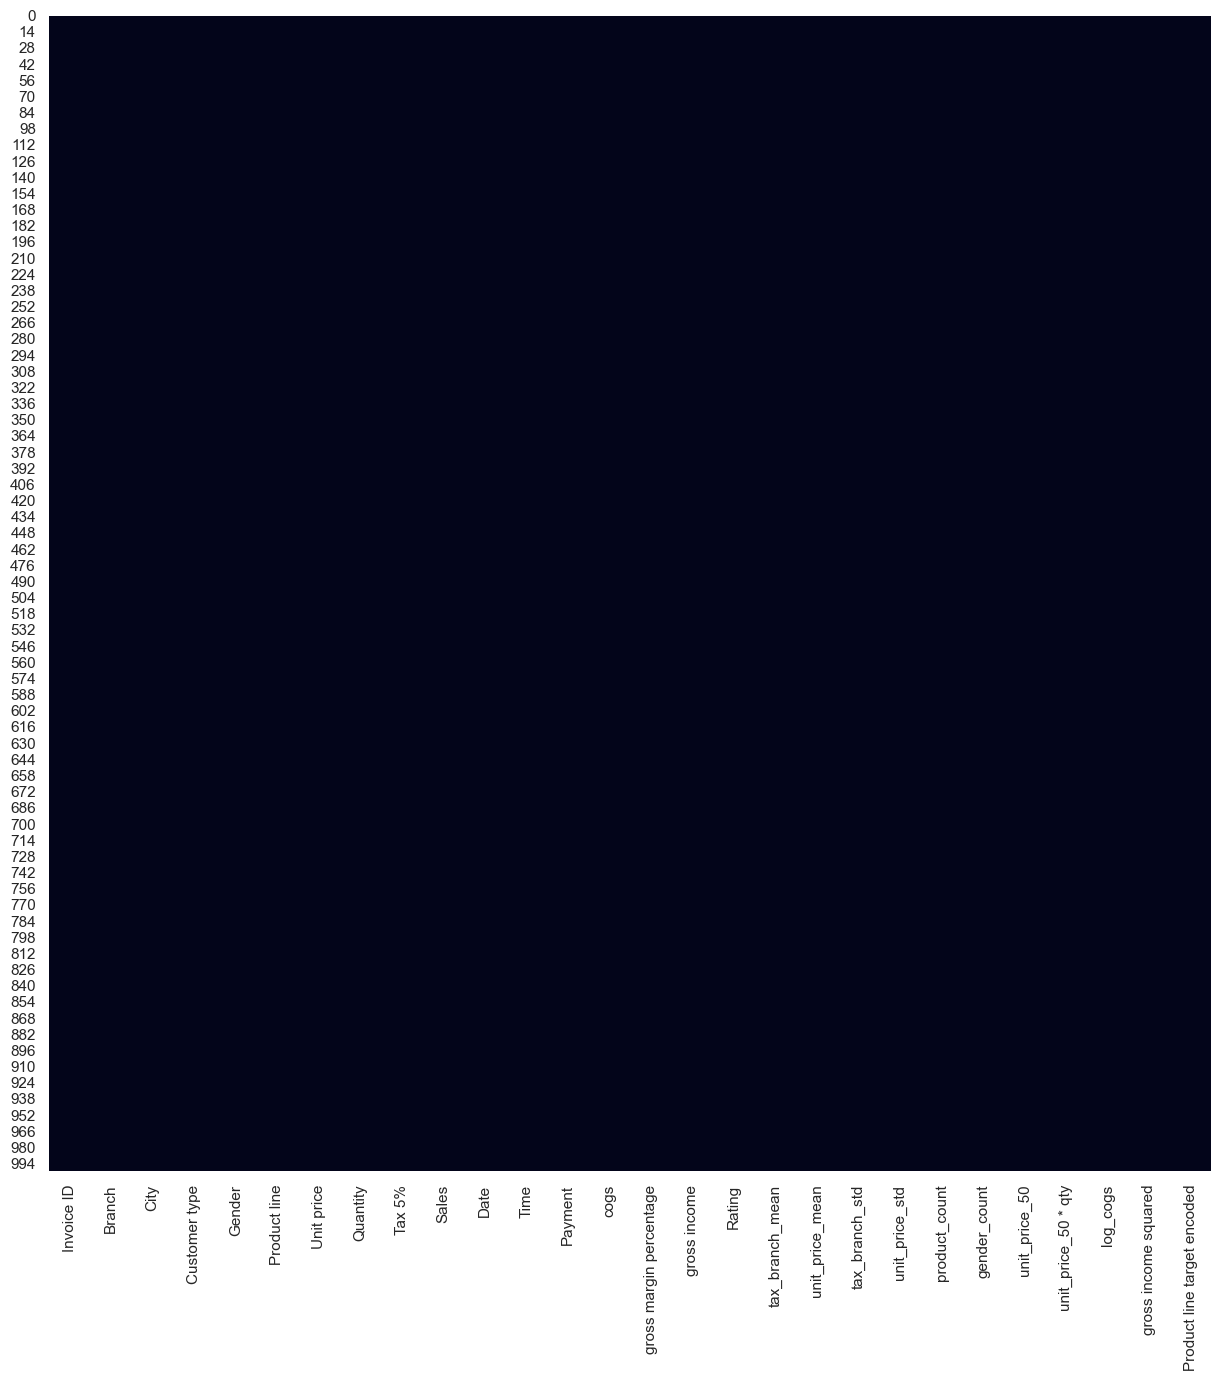

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cbar=False);

Ugh! Of course their data is somehow different and has missing values! Ugh fine we'll just keep going.

We will fill in the missing numeric variables with the median and the categorical column with the mode. We'll address the categorical missing values after we finish engineering other columns.

There isn't a hard science to choosing what missing value imputation approach you take. Most practitioners test multiple missing value imputation techniques and decide on the one that gets the best evaluation score (Good job, you already partially did this in your practice application).

## Decomposing Date

Now we can decompose the date column to its attributes. Note we encode month and day as string variables as there isn't a numeric relationship within them. Days and months have fixed bounds, so we can kind of think of them as categories.

Let's put year, month, and dat into their own columns in the data frame.......

You now what... since we've already covered the topics, many of which we've already personally applied, and the data I have doesn't seem to be the same as theirs... let's just move on.

Here's the one big takeaway I was looking for:

```
plt.figure(figsize=(10, 8))
sns.heatmap(engineered_df.corr())
```

This is that correlation heatmap I've been looking for. Probably the most important thing here. The details are going to be covered in the next section.